In [31]:
from pydub import AudioSegment

In [32]:
mp3_file_path = "piano_mp3/alb_esp1.mp3"

audio = AudioSegment.from_mp3(mp3_file_path)

In [33]:
audio.frame_rate

44100

In [4]:
import numpy as np

audio_waveform = np.frombuffer(audio.raw_data, dtype=np.int16)

In [5]:
len(audio_waveform)

8137728

C:\Users\Kevin\AppData\Local\Temp\ipykernel_23036\2622248716.py:10: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(t, f, 10 * np.log(Sxx))


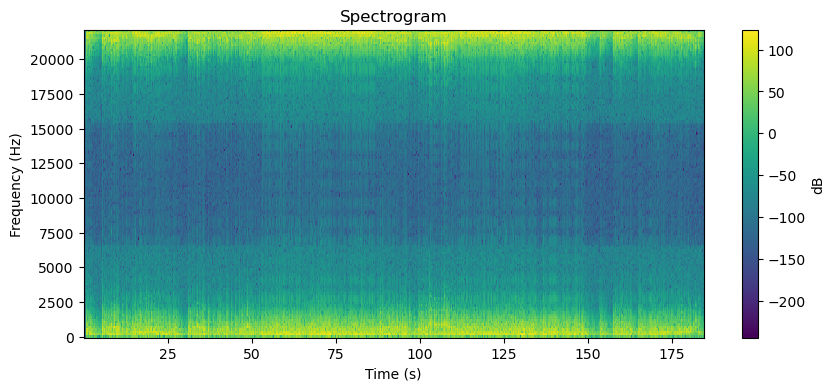

In [6]:
# convert to spectrogram

from scipy.signal import spectrogram
import matplotlib.pyplot as plt

f, t, Sxx = spectrogram(audio_waveform, fs=audio.frame_rate) # this is the spectrogram

# plot
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, 10 * np.log(Sxx))
plt.title("Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="dB")
plt.show()

In [7]:
len(t)

36329

In [8]:
# get MIDI information

import pretty_midi

midi_file = "piano_midi/alb_esp1_format0.mid"
midi_data = pretty_midi.PrettyMIDI(midi_file)

# Extract note events (onsets, offsets, pitches)
for instrument in midi_data.instruments:
    for note in instrument.notes:
        onset_time = note.start
        offset_time = note.end
        pitch = note.pitch

# map time to spectrogram bins????? but what if they don't match?

In [9]:
onset_time

91.3176775833332

In [10]:
offset_time

93.2550355833332

In [11]:
pitch

85

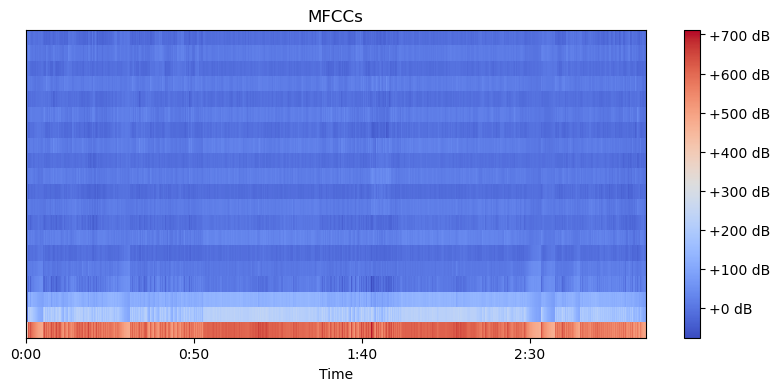

In [17]:
# convert to MFCCs

import librosa

audio_np = np.array(audio.get_array_of_samples())# audio to np array instead of waveform
audio_np = audio_np.astype(float)# librosa mfcc only takesin float

# Compute MFCCs using librosa
sr = audio.frame_rate  # Sample rate
mfccs = librosa.feature.mfcc(y=audio_np, sr=sr)

# mfccs is a 2D array with shape (n_mfcc, num_frames)
# Each row corresponds to an MFCC coefficient over time.

# visualize:

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.0f dB")
plt.title("MFCCs")
plt.show()

In [18]:
audio_np

array([  0.,   0.,   0., ...,   2., -21.,   2.])

In [19]:
# check time resolution for midi data

# Compute time differences between consecutive note-onset times
note_onsets = [note.start for note in midi_data.instruments[0].notes]
time_diffs = [note_onsets[i + 1] - note_onsets[i] for i in range(len(note_onsets) - 1)]

# Calculate the average time resolution
average_time_resolution = sum(time_diffs) / len(time_diffs)
print(f"Average MIDI time resolution: {average_time_resolution:.4f} seconds")

Average MIDI time resolution: 0.1438 seconds


In [26]:
# time resolution for MFCCs

audio, sr = librosa.load('piano_mp3/alb_esp1.mp3', sr=None)
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Calculate the frame duration
num_mfcc_frames = mfccs.shape[1]
total_duration = len(audio) / sr
mfcc_frame_duration = total_duration / num_mfcc_frames
print(f"MFCC frame duration: {mfcc_frame_duration:.4f} seconds")

MFCC frame duration: 0.0116 seconds


In [27]:
mfccs.shape[1]

7948

In [28]:
len(audio)/sr

92.26448979591837

In [30]:
audio

array([ 0.0000000e+00,  2.2210316e-16, -2.3227393e-16, ...,
       -2.2744312e-04, -2.8684037e-04, -2.9775524e-04], dtype=float32)